In [9]:
import os
import copy
import time
import random
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.io
import matplotlib.pyplot as plt
import glob
import re
from datetime import datetime
from dateutil import parser
import dateutil.parser
from scipy.io import savemat

import numpy as np
import scipy.misc
import numpy.random as rng
from PIL import Image, ImageDraw, ImageFont
from sklearn.utils import shuffle
import nibabel as nib #reading MR images
import math
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr


from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from tabulate import tabulate
from IPython.display import display, HTML

In [10]:
DATASET = 'Dataset3.0.csv'

Pearson Lipid Correlations

LHC_ICV                 RHC_ICV                \
                                      r       p-Value         r       p-Value   
SM.D18.0.22.0.                 0.220817  1.560055e-29  0.217195  1.324816e-28   
SM.41.0.                       0.214847  5.194250e-28  0.202549  5.132323e-25   
PE.P.16.0.22.6.                0.203748  2.670230e-25  0.197590  7.319016e-24   
PE.P.18.0.22.6.                0.174298  7.635297e-19  0.163382  1.022355e-16   
SM.D18.1.23.0..SM.D17.1.24.0.  0.170563  4.230197e-18  0.147976  5.907197e-14   
PE.36.0.                      -0.010768  5.867925e-01 -0.007969  6.875167e-01   
PE.38.5...A.                  -0.096583  1.027856e-06 -0.089847  5.519587e-06   
PE.38.5...B.                  -0.029578  1.353805e-01 -0.031747  1.089890e-01   
PE.O.16.0.18.2.                0.009541  6.301005e-01  0.000171  9.931292e-01   
PE.O.16.0.20.3.                0.016706  3.990723e-01  0.015445  4.356180e-01   
AC.18.0.                      -0.162169  1.726264e-16 -0.153938  5.438893e-15   
TG.52.3...NL.16.1.            -0.170265  4.841806e-18 -0.172150  2.053639e-18   
LPE.20.4...SN2.               -0.171403  2.888809e-18 -0.147895  6.097548e-14   
LPE.20.4...SN1.               -0.184160  6.894490e-21 -0.157094  1.480773e-15   
TG.52.4...NL.16.1.            -0.191813  1.481954e-22 -0.191624  1.632524e-22   

                                    Age                
                                      r       p-Value  
SM.D18.0.22.0.                -0.251912  3.310465e-38  
SM.41.0.                      -0.231055  2.992856e-32  
PE.P.16.0.22.6.               -0.124973  2.410868e-10  
PE.P.18.0.22.6.               -0.064260  1.167432e-03  
SM.D18.1.23.0..SM.D17.1.24.0. -0.201698  8.135666e-25  
PE.36.0.                       0.021732  2.726392e-01  
PE.38.5...A.                  -0.027644  1.628511e-01  
PE.38.5...B.                  -0.052141  8.451717e-03  
PE.O.16.0.18.2.               -0.093918  2.026190e-06  
PE.O.16.0.20.3.               -0.124405  2.908763e-10  
AC.18.0.                       0.109131  3.301735e-08  
TG.52.3...NL.16.1.             0.035815  7.056392e-02  
LPE.20.4...SN2.               -0.013666  4.903401e-01  
LPE.20.4...SN1.                0.010744  5.876305e-01  
TG.52.4...NL.16.1.             0.066373  7.973234e-04

+-----+-------------------------------------------+----------------------------+----------------------------+----------------------------+
|     | Feature                                   | LHC_ICV                    | RHC_ICV                    | Age                        |
|-----+-------------------------------------------+----------------------------+----------------------------+----------------------------|
| 137 | SM.D18.0.22.0.                            | (R = 0.2208) (p = 0.0000)  | (R = 0.2172) (p = 0.0000)  | (R = -0.2519) (p = 0.0000) |
| 121 | SM.41.0.                                  | (R = 0.2148) (p = 0.0000)  | (R = 0.2025) (p = 0.0000)  | (R = -0.2311) (p = 0.0000) |
| 419 | PE.P.16.0.22.6.                           | (R = 0.2037) (p = 0.0000)  | (R = 0.1976) (p = 0.0000)  | (R = -0.1250) (p = 0.0000) |
| 434 | PE.P.18.0.22.6.                           | (R = 0.1743) (p = 0.0000)  | (R = 0.1634) (p = 0.0000)  | (R = -0.0643) (p = 0.0012) |
| 144 | SM.D18.1.23.0..SM.D

,Feature,LHC_ICV,RHC_ICV,Age
716,TG.52.4...NL.16.1.,-0.191813,-0.191624,NaN
467,LPE.20.4...SN1.,-0.184160,-0.157094,NaN
468,LPE.20.4...SN2.,-0.171403,-0.147895,NaN
714,TG.52.3...NL.16.1.,-0.170265,-0.172150,NaN
595,AC.18.0.,-0.162169,-0.153938,NaN
332,LPC.22.6...SN1.,-0.007002,-0.008519,NaN
777,LPC.20.4....OH.,-0.006590,0.007047,NaN
43,CER.D18.2.23.0.,-0.006062,-0.002593,NaN
282,LPC.15.0...SN1.,-0.005925,-0.002850,NaN
107,SULFATIDE..D18.1..16.0.OH..,-0.005713,-0.021983,NaN


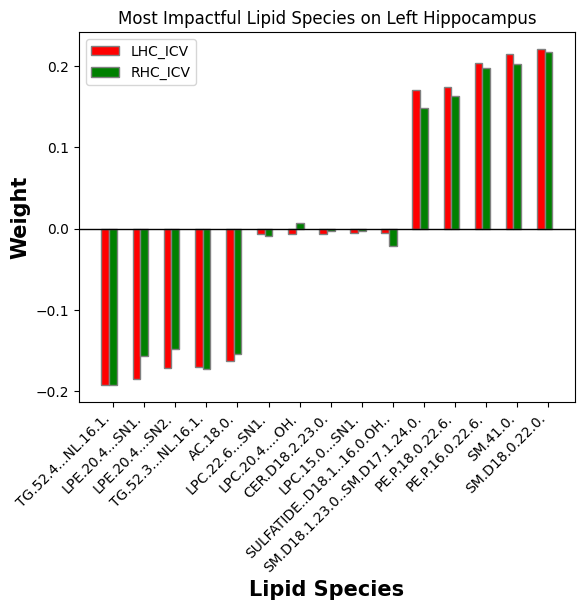

Text(0.5, 1.0, 'Pearson Correlation Heatmap')

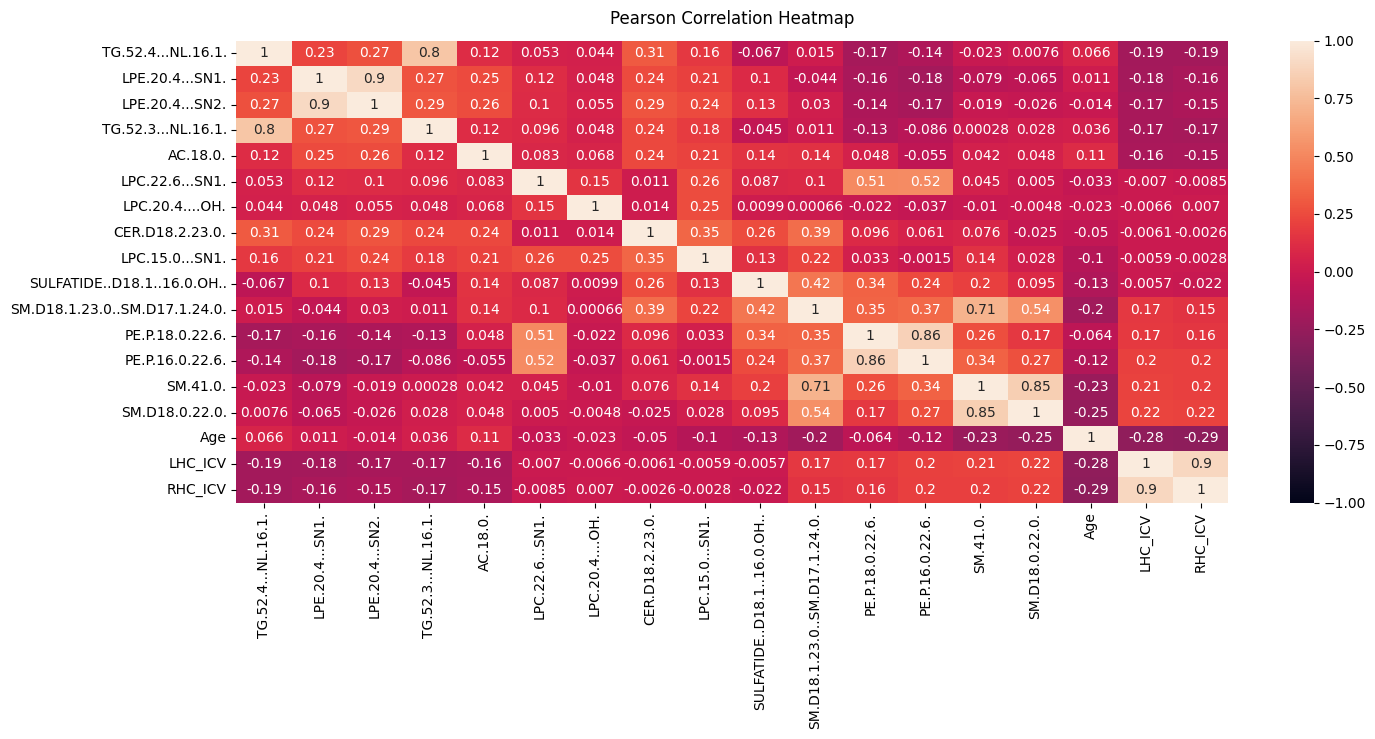

In [28]:
dataset = pd.read_csv(DATASET)
pearson_cor = pd.DataFrame()
dataset['Sex'] = dataset['Sex'].replace({'M': 1, 'F': 0})
dataset = dataset.drop(columns=['RID','VISCODE','VISCODE2', 'Group', 'MRI_Date', 'Exam_Date'])

#-----------------------------------------------------------------------------------------------
styles = [
    dict(selector="th", props=[("font-size", "150%"), ("text-align", "center")]),
    dict(selector="td", props=[("padding", "10px"), ("text-align", "center")]),
]
#-----------------------------------------------------------------------------------------------
columns_list = dataset.columns[48:829].tolist()
listatotal = []
listaL = dataset['LHC_ICV']
listaR = dataset['RHC_ICV']
listaAge = dataset['Age']

for feature in dataset.columns[48:828 + 1]:
    lista = []
    # Calculate correlations
    corrL, pL = pearsonr(dataset[feature], listaL)
    corrR, pR = pearsonr(dataset[feature], listaR)
    corrAge, pAge = pearsonr(dataset[feature], listaAge)
    lista.append(corrL),lista.append(pL),lista.append(corrR),lista.append(pR),lista.append(corrAge),lista.append(pAge)
    listatotal.append(lista)


df = pd.DataFrame(listatotal,
                  index=pd.Index(dataset.columns[48:829].tolist()),
                  columns=pd.MultiIndex.from_product([['LHC_ICV', 'RHC_ICV', 'Age'],['r', 'p-Value']]))
total_rows = df.shape[0]
middle_index = total_rows // 2
start_index = middle_index - 2  # Selecting 2 rows before the middle
end_index = middle_index + 2    # Selecting 2 rows after the middle
selected_rows = df.iloc[start_index:end_index + 1]

df_sorted = df.sort_values(by=('LHC_ICV','r'), ascending=False)

combined_df = pd.concat([df_sorted.head(5),selected_rows, df_sorted.tail(5)])
styled_df = combined_df.style.set_table_styles(styles)
display(combined_df)
#-----------------------------------------------------------------------------------------------
df = pd.DataFrame()

# Assign values to columns in the DataFrame
df['Feature'] = dataset.columns[48:828 + 1]
df['LHC_ICV'] = None
df['RHC_ICV'] = None
df['Age'] = None

# Loop through each feature column and calculate correlations
for feature in df['Feature']:
    # Assuming listaL and listaR are defined somewhere in your code
    listaL = dataset['LHC_ICV']
    listaR = dataset['RHC_ICV']
    listaAge = dataset['Age']

    # Calculate correlations
    corrL, pL = pearsonr(dataset[feature], listaL)
    corrR, pR = pearsonr(dataset[feature], listaR)
    corrAge, pAge = pearsonr(dataset[feature], listaAge)

    # Update the DataFrame with the correlation and p-value
    df.loc[df['Feature'] == feature, 'LHC_ICV'] = f"(R = {corrL:.4f}) (p = {pL:.4f})"
    df.loc[df['Feature'] == feature, 'RHC_ICV'] = f"(R = {corrR:.4f}) (p = {pR:.4f})"
    df.loc[df['Feature'] == feature, 'Age'] = f"(R = {corrAge:.4f}) (p = {pAge:.4f})"
df_sorted = df.sort_values(by='LHC_ICV', ascending=False)
print(tabulate(df_sorted, headers = 'keys', tablefmt = 'psql'))

#--------------------------------------------------------------------------------------

pearson_cor['Feature'] = None
pearson_cor['LHC_ICV'] = None
pearson_cor['RHC_ICV'] = None
pearson_cor['Age'] = None
listaL = dataset['LHC_ICV']
listaR = dataset['RHC_ICV']
lista1 = []
lista2 = []
lista3 = []
lista = []

for i in dataset.columns[48:828 + 1]:
    lista1.append(i)
    lista = []
    lista = dataset[i]
    corrL, _ = pearsonr(lista,listaL)
    corrR, _ = pearsonr(lista,listaR)
    lista2.append(corrL)
    lista3.append(corrR)

pearson_cor['Feature'] = lista1
pearson_cor['LHC_ICV'] = lista2
pearson_cor['RHC_ICV'] = lista3
pearson_cor = pearson_cor.sort_values(by='LHC_ICV')

#----------------------------------------------------------------------------
total_rows = pearson_cor.shape[0]
middle_index = total_rows // 2
start_index = middle_index - 2  # Selecting 2 rows before the middle
end_index = middle_index + 2    # Selecting 2 rows after the middle
selected_rows = pearson_cor.iloc[start_index:end_index + 1]
#--------------------------------------------------------------------------------

combined_df = pd.concat([pearson_cor.head(5),selected_rows, pearson_cor.tail(5)])
display(combined_df)
#--------------------------------------------------------------------------------
# Create x-coordinates for bars
br1 = np.arange(len(combined_df))
br2 = [x + 0.25 for x in br1]
br3 = [x + 0.25 for x in br2]

# Make the plot
plt.bar(br1, combined_df['LHC_ICV'], color='r', width=0.25, edgecolor='grey', label='LHC_ICV')
plt.bar(br2, combined_df['RHC_ICV'], color='g', width=0.25, edgecolor='grey', label='RHC_ICV')

# Adding Xticks
plt.axhline(0, color='black', linestyle='-', linewidth=1)
plt.xlabel('Lipid Species', fontweight='bold', fontsize=15)
plt.ylabel('Weight', fontweight='bold', fontsize=15)
plt.xticks(br2, combined_df['Feature'], rotation=45, ha='right')
plt.title('Most Impactful Lipid Species on Left Hippocampus')

plt.legend()
plt.show()
#--------------------------------------------------------------------------------------
dataset_top10 = pd.DataFrame()
for index, row in combined_df.iterrows():
    dataset_top10[row['Feature']] = dataset[row['Feature']]
dataset_top10['Age'] = dataset['Age']
dataset_top10['LHC_ICV'] = dataset['LHC_ICV']
dataset_top10['RHC_ICV'] = dataset['RHC_ICV']
plt.figure(figsize=(16, 6))
heatmap = sn.heatmap(dataset_top10.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Pearson Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

#-------------------------------------------------------------------------------------

Spearmann Lipid Correlations

,Feature,LHC_ICV,RHC_ICV
716,TG.52.4...NL.16.1.,-0.192629,-0.186064
105,GM3.D18.1.24.1.,-0.153616,-0.168840
344,LPC.O.22.1.,-0.177985,-0.167662
342,LPC.O.20.1.,-0.175922,-0.163274
714,TG.52.3...NL.16.1.,-0.165272,-0.163040
567,FA.14.0.,-0.000590,-0.009804
642,DG.18.2_20.4.,-0.017375,-0.009732
617,AC.24.1..OH,-0.031511,-0.009412
679,TG.48.1...NL.18.1.,-0.015046,-0.009301
51,CER.D19.1.23.0.,-0.022071,-0.009084


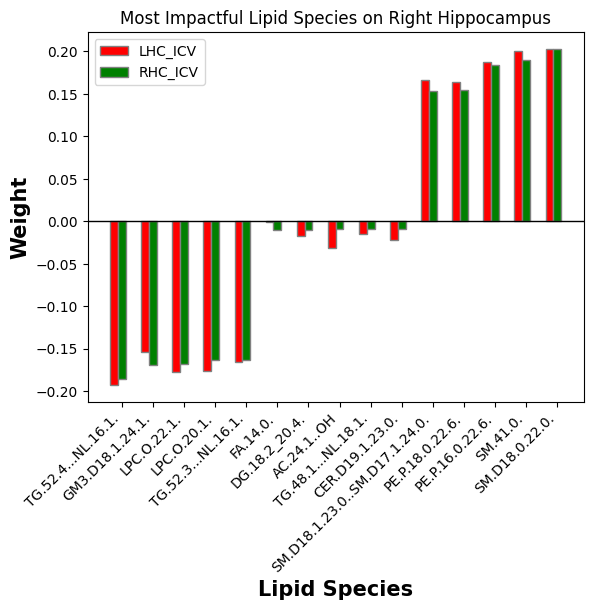

Text(0.5, 1.0, 'Pearson Correlation Heatmap')

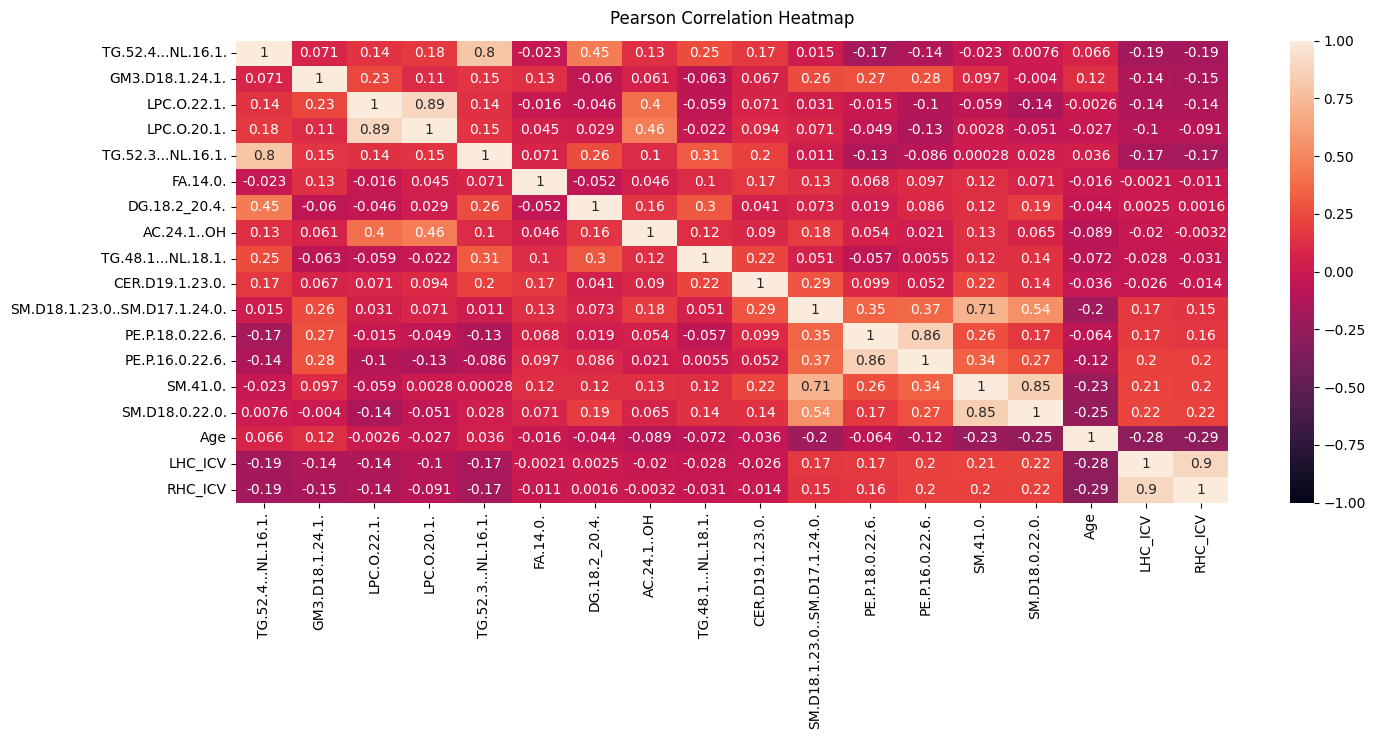

In [13]:
dataset = pd.read_csv(DATASET)
spearman_cor = pd.DataFrame()
dataset['Sex'] = dataset['Sex'].replace({'M': 1, 'F': 0})
dataset = dataset.drop(columns=['RID','VISCODE','VISCODE2', 'Group', 'MRI_Date', 'Exam_Date'])
spearman_cor['Feature'] = None
spearman_cor['LHC_ICV'] = None
spearman_cor['RHC_ICV'] = None
listaL = dataset['LHC_ICV']
listaR = dataset['RHC_ICV']
lista1 = []
lista2 = []
lista3 = []
lista = []

for i in dataset.columns[48:828 + 1]:
    lista1.append(i)
    lista = []
    lista = dataset[i]
    corrL, _ = spearmanr(lista,listaL)
    corrR, _ = spearmanr(lista,listaR)
    lista2.append(corrL)
    lista3.append(corrR)

spearman_cor['Feature'] = lista1
spearman_cor['LHC_ICV'] = lista2
spearman_cor['RHC_ICV'] = lista3

spearman_cor = spearman_cor.sort_values(by='RHC_ICV')

#----------------------------------------------------------------------------
total_rows = spearman_cor.shape[0]
middle_index = total_rows // 2
start_index = middle_index - 2  # Selecting 2 rows before the middle
end_index = middle_index + 2    # Selecting 2 rows after the middle
selected_rows = spearman_cor.iloc[start_index:end_index + 1]
#--------------------------------------------------------------------------------

combined_df = pd.concat([spearman_cor.head(5),selected_rows, spearman_cor.tail(5)])
display(combined_df)

#-----------------------------------------------------------------------------
# Make the plot
plt.bar(br1, combined_df['LHC_ICV'], color='r', width=0.25, edgecolor='grey', label='LHC_ICV')
plt.bar(br2, combined_df['RHC_ICV'], color='g', width=0.25, edgecolor='grey', label='RHC_ICV')

# Adding Xticks
plt.axhline(0, color='black', linestyle='-', linewidth=1)
plt.xlabel('Lipid Species', fontweight='bold', fontsize=15)
plt.ylabel('Weight', fontweight='bold', fontsize=15)
plt.xticks(br2, combined_df['Feature'], rotation=45, ha='right')
plt.title('Most Impactful Lipid Species on Right Hippocampus')

plt.legend()
plt.show()
#-----------------------------------------------------------------------------------
dataset_top10 = pd.DataFrame()
for index, row in combined_df.iterrows():
    dataset_top10[row['Feature']] = dataset[row['Feature']]
dataset_top10['Age'] = dataset['Age']
dataset_top10['LHC_ICV'] = dataset['LHC_ICV']
dataset_top10['RHC_ICV'] = dataset['RHC_ICV']
plt.figure(figsize=(16, 6))
heatmap = sn.heatmap(dataset_top10.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Pearson Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


# Plots

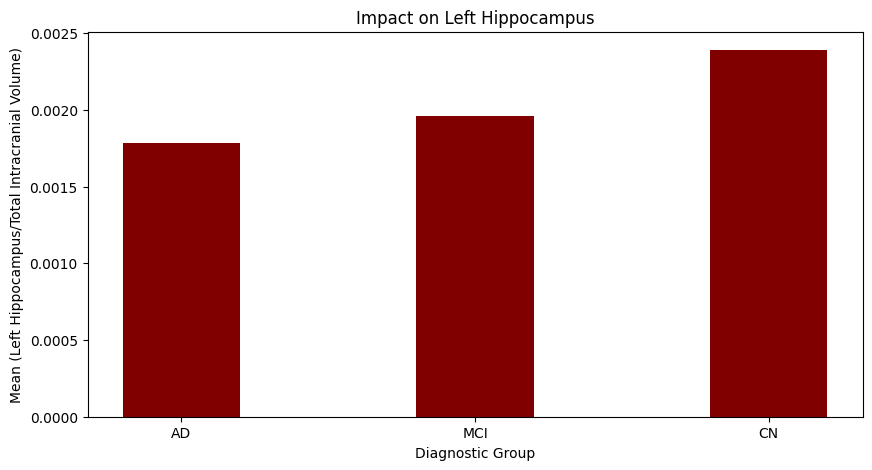

In [22]:
dataset = pd.read_csv(DATASET)
data1 = dataset['Left-Hippocampus']
data2 = dataset['Group']
fig = plt.figure(figsize = (10, 5))
data = pd.DataFrame()
ad,mci,cn = 0,0,0
c1,c2,c3 = 0,0,0,
for index, row in dataset.iterrows():
    if row['Group'] == 'AD': 
        ad+= row['LHC_ICV']
        c1+=1
    elif row['Group'] == 'MCI': 
        mci+= row['LHC_ICV']
        c2+=1
    elif row['Group'] == 'CN': 
        cn+= row['LHC_ICV']
        c3+=1
data = {'Group':['AD','MCI','CN'],
        'Mean Ratio':[(ad/c1),(mci/c2),(cn/c3)]}

# creating the bar plot
plt.bar(data['Group'], data['Mean Ratio'], color ='maroon', 
        width = 0.4)
 
plt.xlabel("Diagnostic Group")
plt.ylabel("Mean (Left Hippocampus/Total Intracranial Volume)")
plt.title("Impact on Left Hippocampus")
plt.show()

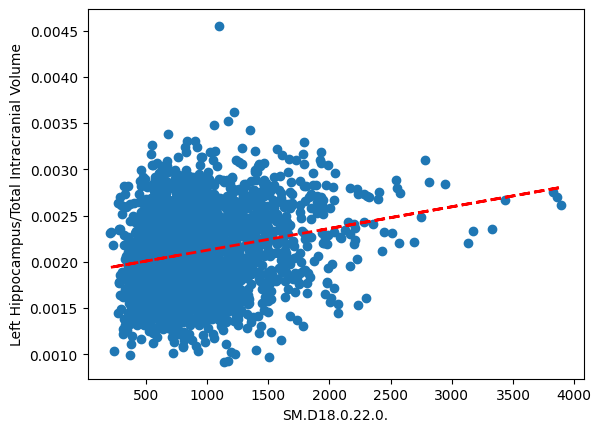

In [4]:
dataset = pd.read_csv(DATASET)
plt.scatter(dataset['SM.D18.0.22.0.'], dataset['LHC_ICV'])
a,b = np.polyfit(dataset['SM.D18.0.22.0.'],dataset['LHC_ICV'],1)
plt.plot(dataset['SM.D18.0.22.0.'],a*dataset['SM.D18.0.22.0.']+b, color='red', linestyle='--', linewidth=2)
plt.xlabel("SM.D18.0.22.0.")
plt.ylabel("Left Hippocampus/Total Intracranial Volume")
plt.show()



### Age

Spearman Correlation: -0.26626290475781206
Pearson Correlation: -0.2759969631653015


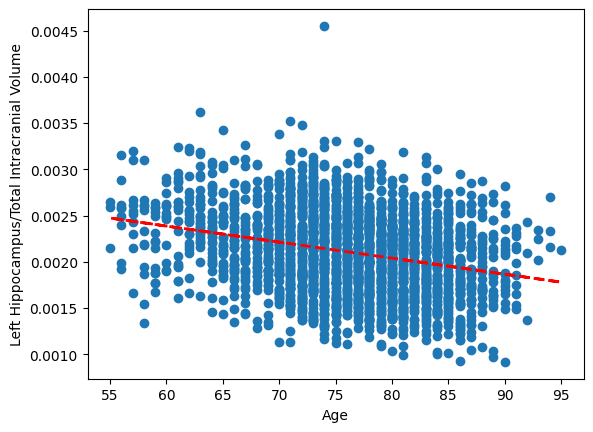

In [17]:
dataset = pd.read_csv(DATASET)
age = dataset['Age']
ratio = dataset['LHC_ICV']
corrS, _ = spearmanr(age,ratio)
corrP, _ = pearsonr(age,ratio)
print("Spearman Correlation:",corrS)
print("Pearson Correlation:",corrP)
a,b = np.polyfit(age,ratio,1)
plt.scatter(dataset['Age'], dataset['LHC_ICV'])
plt.plot(age,a*age+b, color='red', linestyle='--', linewidth=2)
plt.xlabel("Age")
plt.ylabel("Left Hippocampus/Total Intracranial Volume")
plt.show()